# Inter-Annotator Agreement

L'Inter-Annotator Agreement (IAA) è una misura della capacità di più annotatori di prendere la stessa decisione di annotazione per una determinata categoria. Gli algoritmi di elaborazione del linguaggio naturale supervisionati utilizzano un set di dati etichettati, spesso annotati dall'uomo. 

L'IAA mostra quanto siano chiare le linee guida per l'annotazione, quanto siano state comprese in modo uniforme dagli annotatori e quanto sia riproducibile l'attività di annotazione. 

L'accuracy dei modelli ed altre misure non tengono conto dell'agreement che possono verificarsi quando le persone annotano le istanze. 

Le misure che tengono conto dell'accordo casuale atteso sono:


*   Cohen’s 𝜅: due annotatori che annotano ogni istanza con una categoria (target). 

*   Fleiss’ 𝜅:  ogni istanza è stata annotata 𝑛 volte con una categoria (target).



**N.B.** Il Cohen’s 𝜅 è calcolato tra una coppia di annotatori e Fleiss’ 𝜅 su un gruppo di annotatori multipli.


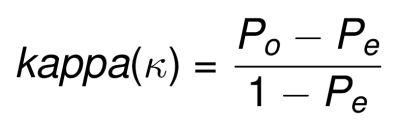

**Kappa di Cohen**

Il coefficiente kappa di Cohen(κ) è una statistica che misura l'affidabilità tra gli annotatori per le voci qualitative (categoriche). 

È una misura più robusta rispetto al semplice calcolo della percentuale di accordo, poiché κ tiene conto della possibilità che l'accordo si verifichi per caso. 

È una misura di affidabilità a coppie tra due annotatori.

Cohen’s kappa statistic è l'agreement tra due valutatori dove $P_o$ è l'agreement relativo osservato tra i valutatori (identico all'accuratezza) e $P_e$ è la probabilità ipotetica di un accordo casuale.


**Kappa di Fleiss**


Il kappa di Fleiss è una misura statistica per valutare l'affidabilità dell'accordo tra un numero fisso di annotatori quando si assegnano valutazioni categoriche a diversi item o si classificano item. 

Si tratta di una generalizzazione della metrica di valutazione pi greco di Scott (𝜋) per due annotatori, estesa a più annotatori. 

Il pi greco di Scott e il Cohen funzionano solo per due valutatori, il Fleiss funziona per un numero qualsiasi di valutatori che danno valutazioni categoriche a un numero fisso di item. 

In [ ]:
def cohen_kappa(ann1, ann2):
    """Computes Cohen kappa for pair-wise annotators.
    :param ann1: annotations provided by first annotator
    :type ann1: list
    :param ann2: annotations provided by second annotator
    :type ann2: list
    :rtype: float
    :return: Cohen kappa statistic
    """
    count = 0
    for an1, an2 in zip(ann1, ann2):
        if an1 == an2:
            count += 1
    A = count / len(ann1)  # observed agreement A (Po)

    uniq = set(ann1 + ann2)
    E = 0  # expected agreement E (Pe)
    for item in uniq:
        cnt1 = ann1.count(item)
        cnt2 = ann2.count(item)
        count = ((cnt1 / len(ann1)) * (cnt2 / len(ann2)))
        E += count

    return round((A - E) / (1 - E), 4)

In [ ]:
def fleiss_kappa(M):
    """Computes Fleiss' kappa for group of annotators.
    :param M: a matrix of shape (:attr:'N', :attr:'k') with 'N' = number of subjects and 'k' = the number of categories.
        'M[i, j]' represent the number of raters who assigned the 'i'th subject to the 'j'th category.
    :type: numpy matrix
    :rtype: float
    :return: Fleiss' kappa score
    """
    N, k = M.shape  # N is # of items, k is # of categories
    n_annotators = float(np.sum(M[0, :]))  # # of annotators
    tot_annotations = N * n_annotators  # the total # of annotations
    category_sum = np.sum(M, axis=0)  # the sum of each category over all items

    # chance agreement
    p = category_sum / tot_annotations  # the distribution of each category over all annotations
    PbarE = np.sum(p * p)  # average chance agreement over all categories

    # observed agreement
    P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
    Pbar = np.sum(P) / N  # add all observed agreement chances per item and divide by amount of items

    return round((Pbar - PbarE) / (1 - PbarE), 4)

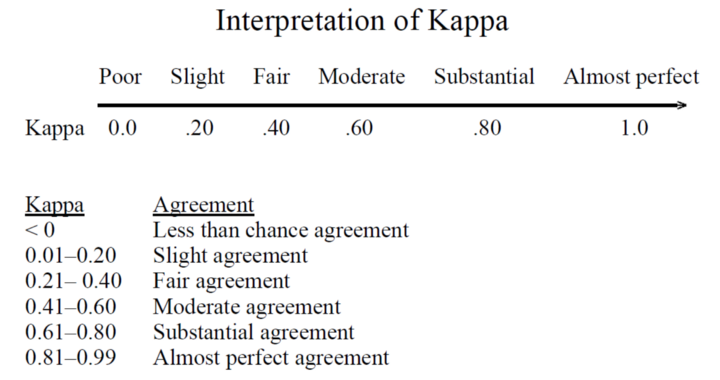

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
from sklearn.metrics import cohen_kappa_score
import statsmodels
from statsmodels.stats import inter_rater as irr

In [ ]:
orig = [
    [1, 1, 1],
    [1, 2, 2],
    [1, 1, 0]
        ] 

In [ ]:
agg = irr.aggregate_raters(orig) 

In [ ]:
agg

(array([[0, 3, 0],
        [0, 1, 2],
        [1, 2, 0]]), array([0, 1, 2]))

In [ ]:
agg = irr.aggregate_raters(orig) # returns a tuple (data, categories)
irr.fleiss_kappa(agg[0], method='fleiss')

0.09999999999999977

# Tortus

Un pacchetto python che semplifica l'aggiunta di etichette ai dati di testo all'interno di un Jupyter Notebook.

In [ ]:
!pip install tortus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from tortus import Tortus

In [ ]:
reviews = pd.read_csv('sample_absita_2018.csv')


In [ ]:
reviews.head()


,sentence
0,La colazione è ottima e variegata.
1,La cordialità del proprietario e del resto del...
2,"Le camere sono tutto sommato mediocri, datate ..."
3,La mia camera era praticamente senza finestra.
4,Personale molto gentile e disponibile.


In [ ]:
tortus = Tortus(
    reviews,
    'sentence',
    num_records=64
)

In [ ]:
tortus.annotate()


Output()

In [ ]:
tortus.annotations


,id_column,sentence,label,annotated_at
0,15,Bagno stretto e fatiscente Nella prenotazione...,positve,2022-11-14 13:55:36
1,58,"Un po' di rumore della strada, trascutrabile, ...",positve,2022-11-14 13:55:40
2,19,Camera molto rumorosa e giusto per una persona.,positve,2022-11-14 13:55:44


In [ ]:
tortus.annotations.to_csv('annotation.csv', index=False)

# Calcolo Agreement